<a href="https://colab.research.google.com/github/ArturoSbr/MARS/blob/main/MARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# Funciones de bisagra (hinge functions)
Una función de bisagra está compuesta de dos funciones rectificadoras. Para una observación $x$ y constantes $\beta_1$, $\beta_2$ y $\alpha$, una función de este tipo toma la forma:

$\beta_1 \text{max}(0, x - \alpha)$

ó

$\beta_2 \text{max}(0, \alpha - x)$

Cada una de las funciones dentro de la función de bisgra son iguales a cero antes o después de llegar al *knot*. La función agrega estas dos funciones disjuntas para crear una función lineal por partes:

$f(x; \alpha, \beta_1, \beta_2) = \beta_1 \times \text{max}(0, x - \alpha) +
\beta_2 \times \text{max}(0, \alpha - x)$

In [2]:
# Definir una función de bisagra
def hinge(x, a, b_1, b_2):
    '''
    Función de bisagra.
    Argumentos:
        x: array-like
            Observaciones de la variable independiente
        a: float
            knot
        b_1: float
            Pendiente de la primera función lineal
        b_2: float
            Pendiente de la segunda función lineal
    '''
    y = []
    for x_i in x:
        y.append(b_1 * max(0, a - x_i) + b_2 * max(0, x_i - a))
    return y

In [3]:
# Declarar 21 observaciones (-10, -9, ... , 9, 10)
x = np.arange(-10, 11, 1)

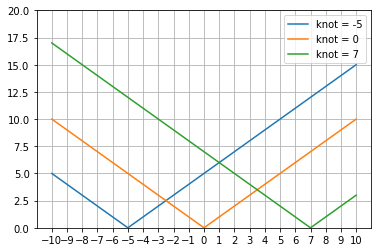

In [4]:
# Cambios en el knot
for a in [-5, 0, 7]:
    plt.plot(x, hinge(x, a=a, b_1=1, b_2=1), label='knot = ' + str(a))
plt.xticks(ticks=x)
plt.ylim(0, 20)
plt.legend()
plt.grid()
plt.show()

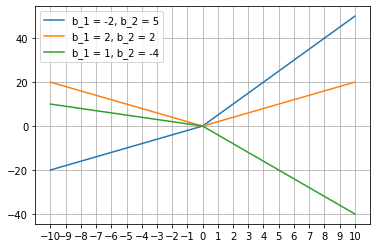

In [5]:
# Cambios en las pendientes
for b_1, b_2 in [(-2, 5), (2, 2), (1, -4)]:
    plt.plot(x, hinge(x, a=0, b_1=b_1, b_2=b_2), label='b_1 = ' + str(b_1) + ', b_2 = ' + str(b_2))
plt.xticks(x)
plt.grid()
plt.legend()
plt.show()

# Multivariate Adaptive Rregression Spline (MARS)


In [6]:
df = pd.read_csv(load_boston()['filename'], skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


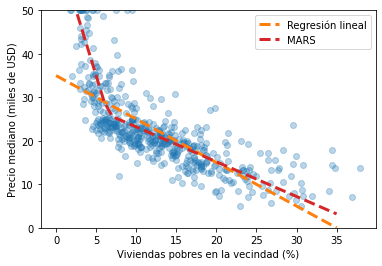

In [7]:
x = np.arange(0, 36)
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.3)
plt.plot(x, 35 - x,
         ls='--', lw=3, color='C1', label='Regresión lineal')
plt.plot(x, 26 + np.array(hinge(x=x, a=6.5, b_1=6, b_2=-0.8)),
         lw=3, color='C3', ls='--', label='MARS')
# Styling
plt.ylim(0, 50)
plt.legend()
plt.xlabel('Viviendas pobres en la vecindad (%)')
plt.ylabel('Precio mediano (miles de USD)')
plt.show()

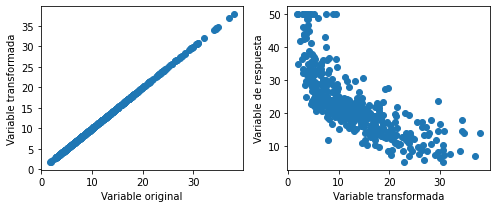

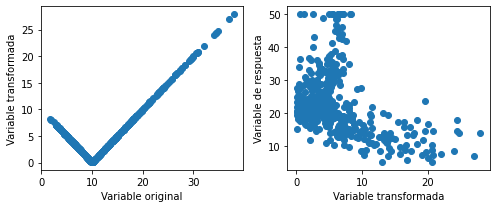

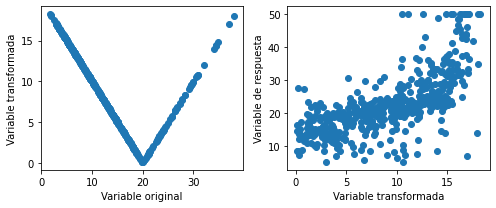

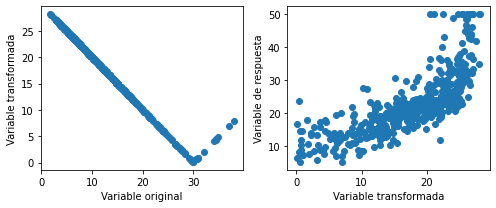

In [8]:
# Variable independiente y variable dependiente
x, y = df['LSTAT'].values, df['MEDV'].values

# Propuestas de puntos de corte
for a in [0, 10, 20, 30]:
    # Transformación
    x_hinge = hinge(x=x, a=a, b_1=1, b_2=1)
    # Scatter plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
    # x' vs x
    axes[0].scatter(x, x_hinge)
    axes[0].set_xlabel('Variable original')
    axes[0].set_ylabel('Variable transformada')
    # x' vs y
    axes[1].scatter(x_hinge, y)
    axes[1].set_xlabel('Variable transformada')
    axes[1].set_ylabel('Variable de respuesta')
    #Styling
    fig.tight_layout()
    plt.show()